# Домашнє завдання
Завдання, що пропонуються, необхідно оформити у вигляді __одного__ `jupyter` ноутбука.

## Завдання 1
У цьому завданні вам потрібно завантажити ось [цей](https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view) датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом `mnist`. Для кожного з них застосуйте алгоритм `K-means` для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

## Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з `mnist` датасетом, вам потрібно ще скористатись алгоримтом `PCA` щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

# Imports

In [32]:
import os

import pandas as pd
import numpy as np

from google.colab import drive

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Drive connection

In [33]:
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/materials/homework6/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DataSet prepare

In [34]:
data_2d_df = pd.read_csv(os.path.join(data_path, 'data_2d.csv',), header=None)
mnist_df = pd.read_csv(os.path.join(data_path, 'mnist.csv',), header=None)

In [35]:
data_2d_df

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [36]:
mnist_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task 1

In [90]:
rng = 11

In [91]:
# 2D DataSet

inertions_2d = []

for n in range(1, rng):
  kmeans = KMeans(n_clusters=n, random_state=0, n_init='auto')
  kmeans.fit(data_2d_df)
  inertions_2d.append(kmeans.inertia_)

In [107]:
# MNIST DataSet

pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(mnist_df)

In [108]:
inertions_mnist = []

for n in range(1, rng):
  kmeans = KMeans(n_clusters=n, random_state=0, n_init='auto')
  new = kmeans.fit(data_mnist_pca)
  inertions_mnist.append(kmeans.inertia_)

# Task 2

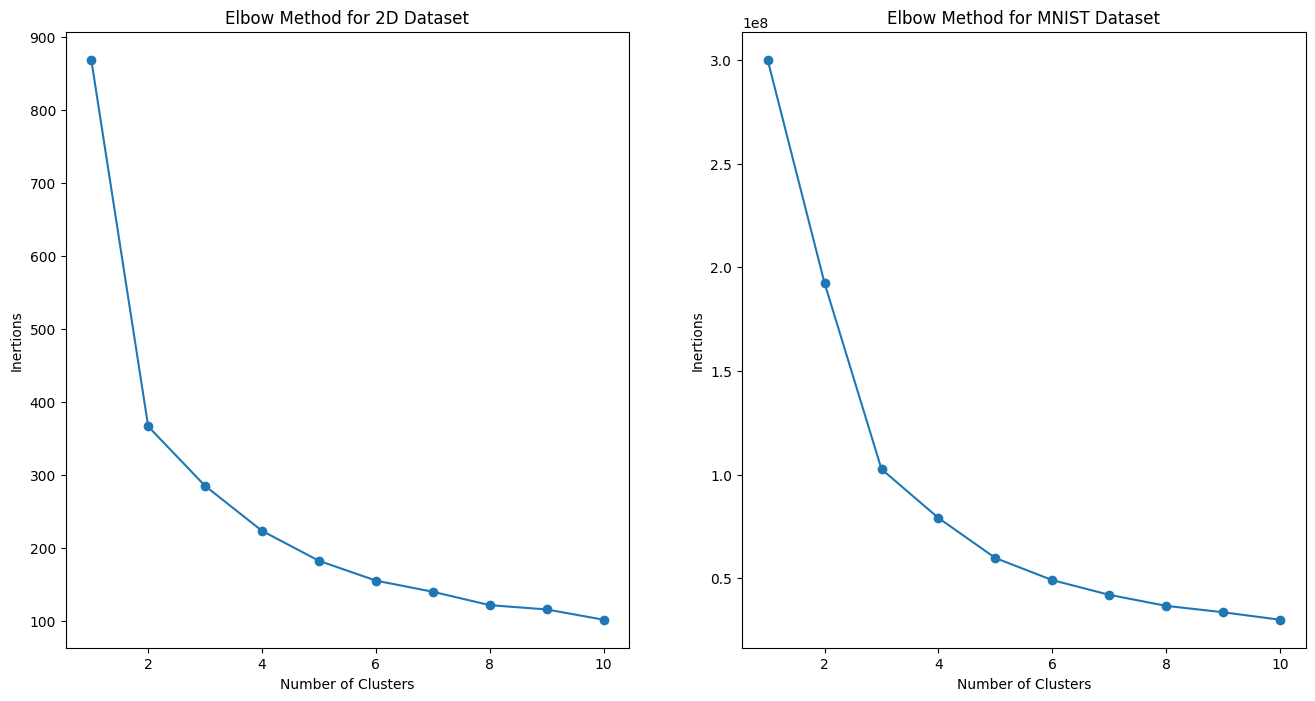

In [109]:
plt.figure(figsize = (16, 8))

# 2D DataSet
plt.subplot(1, 2, 1)
plt.plot(
  range(1, rng),
  inertions_2d,
  marker='o'
)
plt.title('Elbow Method for 2D Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertions')

# MNIST DataSet
plt.subplot(1, 2, 2)
plt.plot(
  range(1, rng),
  inertions_mnist,
  marker='o'
)
plt.title('Elbow Method for MNIST Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertions')

plt.show()

In [110]:
# 2D DataSet
n_optimal_2d = 2
# MNIST DataSet
n_optimal_mnist = 3

In [113]:
# 2D DataSet
kmeans_2d = KMeans(n_clusters=n_optimal_2d, random_state=0, n_init='auto')
kmeans_2d.fit(data_2d_df)
labels_2d = kmeans_2d.labels_

# MNIST DataSet
kmeans_mnist = KMeans(n_clusters=n_optimal_mnist, random_state=0, n_init='auto')
kmeans_mnist.fit(data_mnist_pca)
labels_mnist = kmeans_mnist.labels_

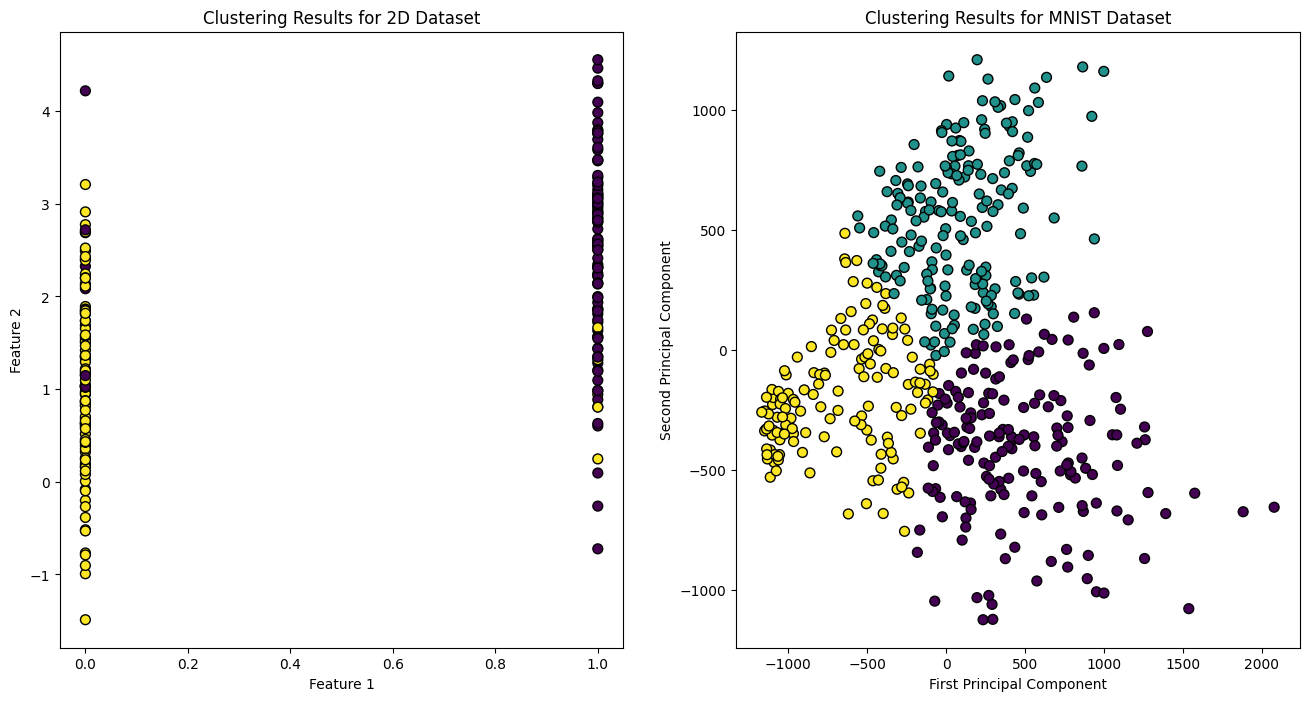

In [114]:
plt.figure(figsize = (16, 8))

# 2D DataSet
plt.subplot(1, 2, 1)
plt.scatter(
  data_2d_df.values[:, 0],
  data_2d_df.values[:, 1],
  c=labels_2d,
  cmap='viridis',
  edgecolors='k',
  s=50,
  marker='o'
)
plt.title('Clustering Results for 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# MNIST DataSet
plt.subplot(1, 2, 2)
plt.scatter(
  data_mnist_pca[:, 0],
  data_mnist_pca[:, 1],
  c=labels_mnist,
  cmap='viridis',
  edgecolors='k',
  s=50,
  marker='o'
)
plt.title('Clustering Results for MNIST Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()